# Importing pandas and numpy

In [3]:
import numpy as np
import pandas as pd
import io
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, scale

# Loading the dataset

In [4]:
uploaded=files.upload()

Saving car_price_prediction.csv to car_price_prediction.csv


# Analysing the dataset

In [5]:
dataset = pd.read_csv(io.BytesIO(uploaded["car_price_prediction.csv"]))

In [6]:
dataset

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258,4,Automatic,Front,04-May,Left wheel,Black,4


In [7]:
dataset=dataset.drop("ID",1)
X=dataset.drop('Price',1)
y=dataset['Price']

<ipython-input-7-8fa7e23b7fa1>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset=dataset.drop("ID",1)
<ipython-input-7-8fa7e23b7fa1>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=dataset.drop('Price',1)


In [8]:
s = (X.dtypes == 'object')
O_cols = list(s[s].index)

In [9]:
from sklearn.preprocessing import OrdinalEncoder

Ord_Enc = OrdinalEncoder()
X[O_cols] = Ord_Enc.fit_transform(X[O_cols])


**Dataset**

In [10]:
X

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,114.0,32.0,1241.0,2010,4.0,1.0,2.0,3.5,186005,6,0.0,0.0,1.0,0.0,12.0,12
1,4.0,8.0,657.0,2011,4.0,0.0,5.0,3.0,192000,6,2.0,0.0,1.0,0.0,1.0,8
2,0.0,21.0,683.0,2006,3.0,0.0,5.0,1.3,200000,4,3.0,1.0,1.0,1.0,1.0,2
3,512.0,16.0,660.0,2011,4.0,1.0,2.0,2.5,168966,4,0.0,0.0,1.0,0.0,14.0,0
4,366.0,21.0,683.0,2014,3.0,1.0,5.0,1.3,91901,4,0.0,1.0,1.0,0.0,12.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,0.0,36.0,384.0,1999,1.0,1.0,0.0,2.0,300000,4,1.0,2.0,0.0,0.0,12.0,5
19233,504.0,23.0,1333.0,2011,9.0,1.0,5.0,2.4,161600,4,2.0,1.0,1.0,0.0,11.0,8
19234,508.0,23.0,1441.0,2010,4.0,1.0,1.0,2.0,116365,4,0.0,1.0,1.0,0.0,7.0,4
19235,83.0,8.0,455.0,2007,4.0,1.0,1.0,2.0,51258,4,0.0,1.0,1.0,0.0,1.0,4


In [11]:
X.describe

<bound method NDFrame.describe of         Levy  Manufacturer   Model  Prod. year  Category  Leather interior  \
0      114.0          32.0  1241.0        2010       4.0               1.0   
1        4.0           8.0   657.0        2011       4.0               0.0   
2        0.0          21.0   683.0        2006       3.0               0.0   
3      512.0          16.0   660.0        2011       4.0               1.0   
4      366.0          21.0   683.0        2014       3.0               1.0   
...      ...           ...     ...         ...       ...               ...   
19232    0.0          36.0   384.0        1999       1.0               1.0   
19233  504.0          23.0  1333.0        2011       9.0               1.0   
19234  508.0          23.0  1441.0        2010       4.0               1.0   
19235   83.0           8.0   455.0        2007       4.0               1.0   
19236  480.0          23.0  1333.0        2012       9.0               1.0   

       Fuel type  Engine volu

# Graphical comparison
**Types of graphs are:- **


*   Scatter plot
*   Pie plot

*   Bar plot
*   Line plot





Pie Plot: Fuel type vs. Price

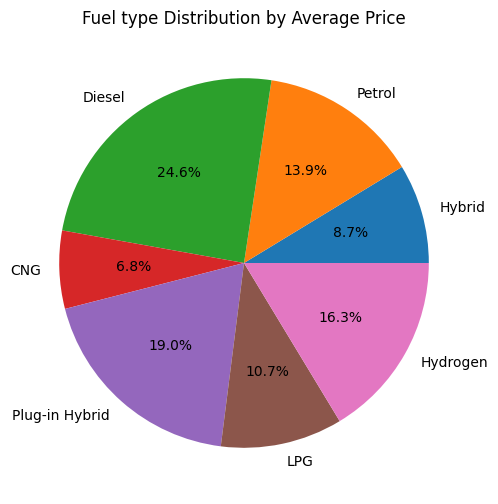

In [12]:
mean_prices = {}
for manufacturer in dataset['Fuel type'].unique():
    manufacturer_prices = y[dataset['Fuel type'] == manufacturer]
    mean_prices[manufacturer] = manufacturer_prices.mean()
plt.figure(figsize=(10, 6))
plt.pie(mean_prices.values(), labels=mean_prices.keys(), autopct='%1.1f%%')
plt.title('Fuel type Distribution by Average Price')
plt.show()

Bar graph: Manufacturer vs Price

<ipython-input-24-9f71da2e5010>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(mean_prices.keys())


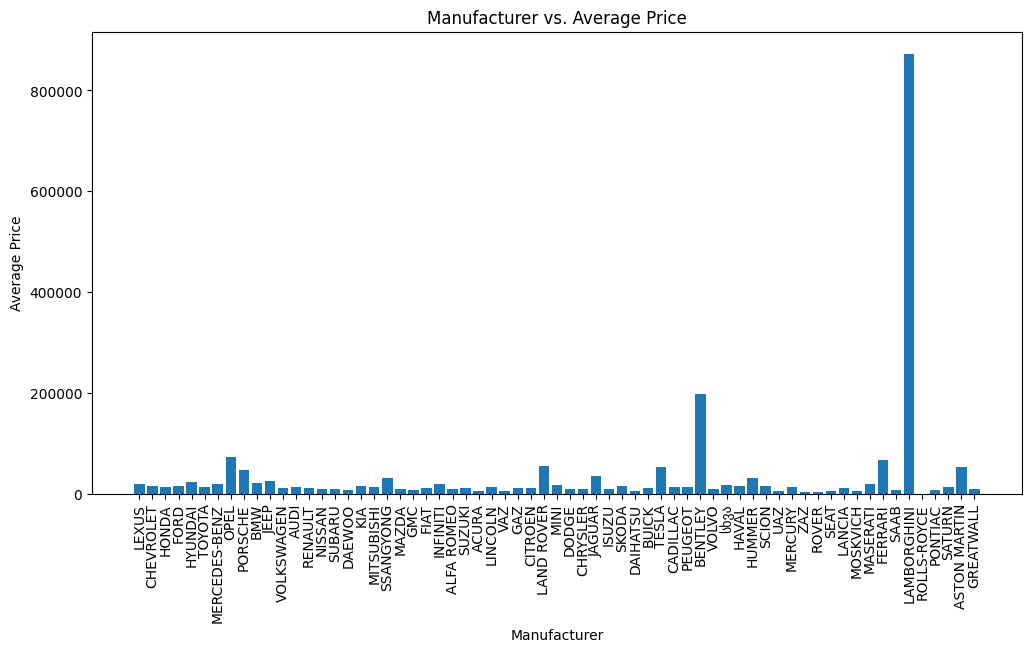

In [24]:
mean_prices = {}
for manufacturer in dataset['Manufacturer'].unique():
    manufacturer_prices = y[dataset['Manufacturer'] == manufacturer]
    mean_prices[manufacturer] = manufacturer_prices.mean()
plt.figure(figsize=(12, 6))
plt.bar(mean_prices.keys(), mean_prices.values())
plt.xlabel('Manufacturer')
plt.ylabel('Average Price')
plt.title('Manufacturer vs. Average Price')
plt.xticks(rotation=90)
plt.gca().set_xticklabels(mean_prices.keys())
plt.show()

Line Plot: Prod. year vs. Price

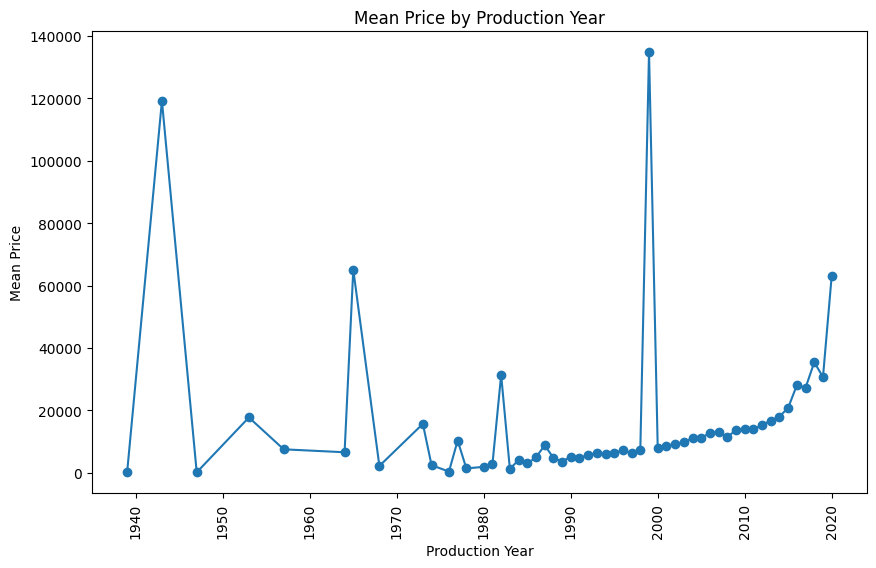

In [14]:
mean_price_by_year = dataset.groupby('Prod. year')['Price'].mean()
plt.figure(figsize=(10, 6))
plt.plot(mean_price_by_year.index, mean_price_by_year.values, marker='o')
plt.xlabel('Production Year')
plt.ylabel('Mean Price')
plt.title('Mean Price by Production Year')
plt.xticks(rotation=90)
plt.show()

Scatter Plot: Engine volume vs. Price

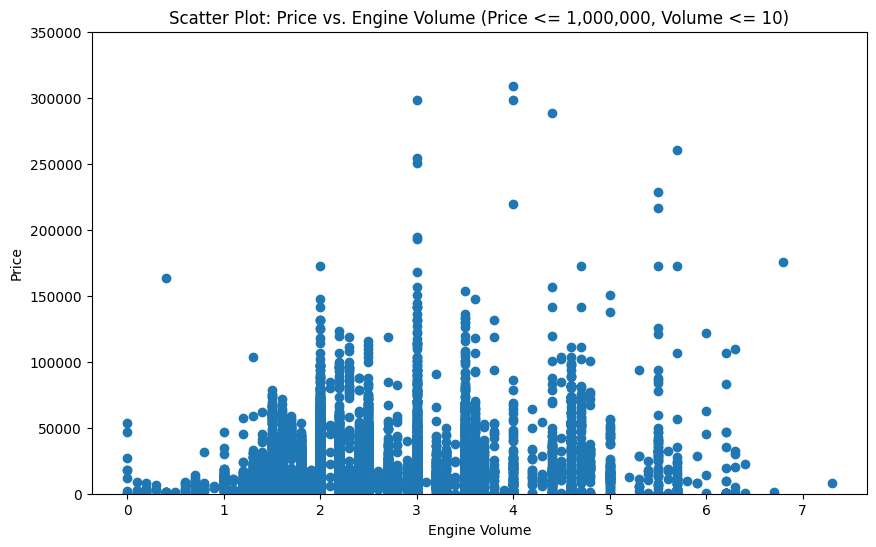

In [15]:
filtered_dataset = dataset[(dataset['Price'] <= 1000000) & (dataset['Engine volume'] <= 10)]
plt.figure(figsize=(10, 6))
plt.scatter(filtered_dataset['Engine volume'], filtered_dataset['Price'])
plt.xlabel('Engine Volume')
plt.ylabel('Price')
plt.title('Scatter Plot: Price vs. Engine Volume (Price <= 1,000,000, Volume <= 10)')
plt.ylim(0, 350000)
plt.show()

# Removing null value rows.

*   Checking the null values in each row
*   And then removing the null values.





In [16]:
rows_with_null = X.isnull().any(axis=1)
dataset_cleaned = X.dropna()
print(dataset_cleaned.head()) # Display the cleaned dataset


    Levy  Manufacturer   Model  Prod. year  Category  Leather interior  \
0  114.0          32.0  1241.0        2010       4.0               1.0   
1    4.0           8.0   657.0        2011       4.0               0.0   
2    0.0          21.0   683.0        2006       3.0               0.0   
3  512.0          16.0   660.0        2011       4.0               1.0   
4  366.0          21.0   683.0        2014       3.0               1.0   

   Fuel type  Engine volume  Mileage  Cylinders  Gear box type  Drive wheels  \
0        2.0            3.5   186005          6            0.0           0.0   
1        5.0            3.0   192000          6            2.0           0.0   
2        5.0            1.3   200000          4            3.0           1.0   
3        2.0            2.5   168966          4            0.0           0.0   
4        5.0            1.3    91901          4            0.0           1.0   

   Doors  Wheel  Color  Airbags  
0    1.0    0.0   12.0       12  
1    1

# Standardization

To calculate X_mean we are using the function mean() , where it sums up all the values of X and then divide by the total number of datapoints.

In [17]:
X_mean = np.mean(X)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


The standard deviation measures the deviation of a feature X around its mean.

In [18]:
X_std = np.std(X)

In [19]:
X_standardized = (X - X_mean) / X_std
print(X_standardized)

           Levy  Manufacturer     Model  Prod. year  Category  \
0     -0.560007     -0.060828  0.923971   -0.161034 -0.811892   
1     -1.065526     -1.411723 -0.498141    0.015379 -0.811892   
2     -1.083908     -0.679989 -0.434828   -0.866685 -1.170251   
3      1.269051     -0.961425 -0.490836    0.015379 -0.811892   
4      0.598090     -0.679989 -0.434828    0.544617 -1.170251   
...         ...           ...       ...         ...       ...   
19232 -1.083908      0.164321 -1.162930   -2.101574 -1.886969   
19233  1.232286     -0.567414  1.148003    0.015379  0.979903   
19234  1.250669     -0.567414  1.410996   -0.161034 -0.811892   
19235 -0.702471     -1.411723 -0.990036   -0.690272 -0.811892   
19236  1.121991     -0.567414  1.148003    0.191792  0.979903   

       Leather interior  Fuel type  Engine volume   Mileage  Cylinders  \
0              0.615306  -0.792543       1.357980 -0.027813   1.180937   
1             -1.625208   0.867354       0.788363 -0.027689   1.180937 

In [20]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
X_train.shape

(15389, 16)

In [22]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Standardization, also known as Z-score scaling it transforms the features of a dataset to have zero mean and unit variance.

# Correlation matrix
1.   The seaborn library is that which provides high-level data visualization built on top of Matplotlib.
2.   The corr() function computes pairwise correlations between the columns of X which results in a square matrix where each element represents the correlation coefficient between two variables.


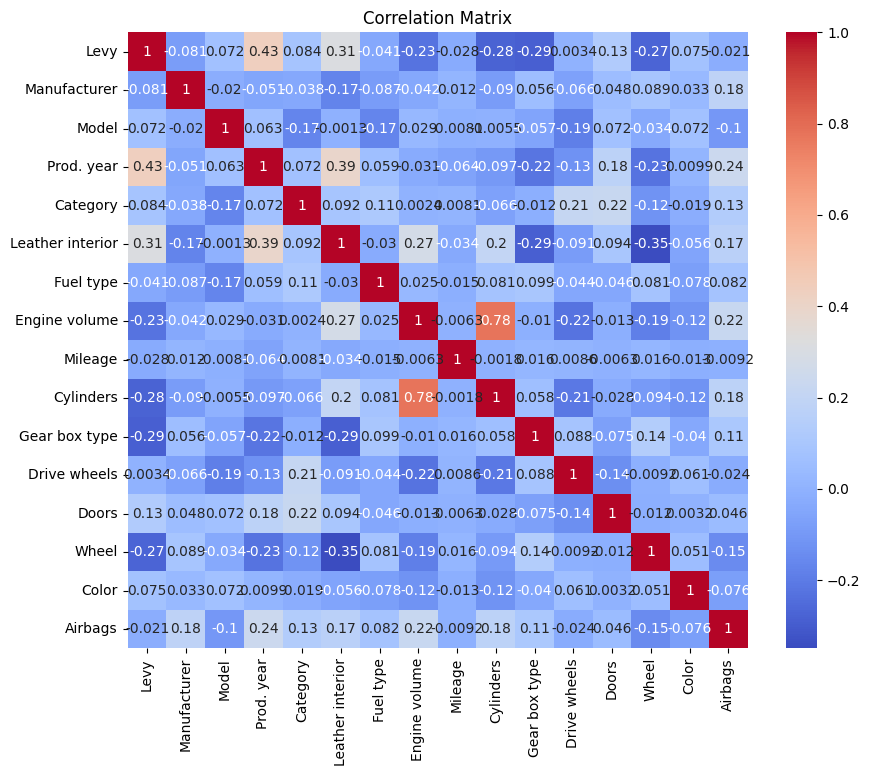

In [23]:
import seaborn as sns
corr_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()
